# Cleaning the Data

#### Load in packages

In [1]:
%run src/imports.py

#### Load in csvs

In [31]:
%run src/loadindata.py

**DATAFRAMES**

REdf, listingsdf, cal_df, listingsdf2

REdf
- shows a bunch of information about the housing market
- useful columns - median sale price, region, region_id, median pending sqft, region_name, region_type

listingsdf
- useful columns - name, neighborhood, latitude, longitude, price, availability, room type

listings2df

- can use to get urls, bedrooms, bathrooms, neighbourhood, lat, long, review_scores_rating

caldf
- maybe use listingID and dates to get average prices
- might not use this

In [33]:
REcleaned = REdf[['region_id','region_type_id','region_name','region_type','median_sale_price','median_sale_ppsf','median_pending_sqft']]

In [34]:
REcleaned = REcleaned.dropna()

In [35]:
REcleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836430 entries, 0 to 957588
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   region_id            836430 non-null  int64  
 1   region_type_id       836430 non-null  int64  
 2   region_name          836430 non-null  object 
 3   region_type          836430 non-null  object 
 4   median_sale_price    836430 non-null  float64
 5   median_sale_ppsf     836430 non-null  float64
 6   median_pending_sqft  836430 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 51.1+ MB


In [36]:
REcleaned.to_csv('data/REcleaned.csv')

In [37]:
listingsdfcleaned = listingsdf[['id','name','host_id','neighbourhood','latitude','longitude','room_type','price','availability_365']]

In [38]:
listingsdfcleaned[listingsdfcleaned.index == 7920]

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,availability_365
7920,39373173,Landing | Apartment Near All South Lamar Fun,263502162,78704,30.24394,-97.78165,Entire home/apt,125,0


In [39]:
listings2dfcleaned = listingsdf2[['id','listing_url','name','neighbourhood_cleansed','latitude','longitude','property_type','room_type','accommodates','availability_30','bathrooms_text','bedrooms','beds']]

In [40]:
listings2dfcleaned.sample(2)

,id,listing_url,name,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,availability_30,bathrooms_text,bedrooms,beds
6967,35140570,https://www.airbnb.com/rooms/35140570,Moving to Austin? 3bd/2bth minutes to DT + UT,78722,30.28643,-97.70740,Entire house,Entire home/apt,8,0,2 baths,3.0,4.0
5762,28607716,https://www.airbnb.com/rooms/28607716,"East Austin Gem, Best Location",78702,30.26132,-97.73204,Entire house,Entire home/apt,14,30,2 baths,3.0,10.0


In [41]:
listings_comb = pd.merge(listingsdfcleaned,listings2dfcleaned,on=['id','name','latitude','longitude','room_type'],how='outer')

#### Change data types:
- neighbourhood - categorical
- neighbourhood_cleansed - (should match with neighbourhood - delete?) - categorical
- room_type - categorical
- property_type - categorical
- bathrooms_text - change to bathrooms int
- bedrooms - int
- beds - int

In [42]:
listings_comb = listings_comb.dropna()

In [43]:
listings_comb = listings_comb.drop(['neighbourhood_cleansed'],axis=1)

In [44]:
listings_comb['neighbourhood'] = listings_comb['neighbourhood'].astype('category')
listings_comb['room_type'] = listings_comb['room_type'].astype('category')
listings_comb['property_type'] = listings_comb['property_type'].astype('category')

In [45]:
listings_comb['bedrooms'] = listings_comb['bedrooms'].astype('int')
listings_comb['beds'] = listings_comb['beds'].astype('int')
listings_comb['accommodates'] = listings_comb['accommodates'].astype('int')

In [46]:
listings_comb['bathrooms_text'].sample(20)

4037           4 baths
5756         2.5 baths
5312           2 baths
1985            1 bath
8806           3 baths
6759    1 private bath
6772           5 baths
5032           3 baths
5392           2 baths
21              1 bath
4318         2.5 baths
36              1 bath
8105           3 baths
3816         2.5 baths
7729            1 bath
9691            1 bath
4696           2 baths
4620            1 bath
3374           2 baths
5586            1 bath
Name: bathrooms_text, dtype: object

In [47]:
listings_comb['bathrooms_text'].replace(r'/d./d*.*', r'/d./d*', regex=True, inplace=True)

In [48]:
import re

In [49]:
def get_bath(str):
    x = re.search('^\d\S*\S*\S*',str)
    #y=x[0]
    #print(type(y))
    if x:
        return x.group()

In [50]:
print(get_bath('2.5 private bath'))

2.5


In [51]:
listings_comb['bathrooms_text'] = listings_comb['bathrooms_text'].apply(get_bath)

In [52]:
listings_comb['bathrooms_text'] = listings_comb['bathrooms_text'].astype('float')

<AxesSubplot:>

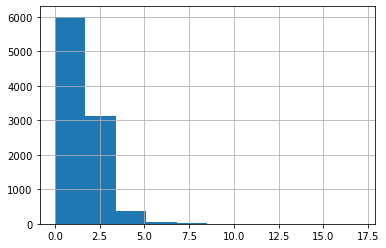

In [53]:
listings_comb['bathrooms_text'].hist()

<AxesSubplot:>

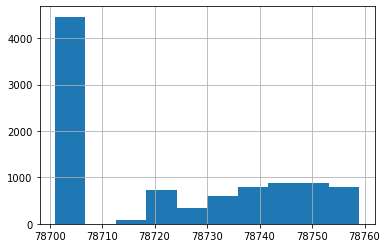

In [54]:
listings_comb['neighbourhood'].hist()

In [55]:
listings_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9574 entries, 0 to 10304
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                9574 non-null   int64   
 1   name              9574 non-null   object  
 2   host_id           9574 non-null   float64 
 3   neighbourhood     9574 non-null   category
 4   latitude          9574 non-null   float64 
 5   longitude         9574 non-null   float64 
 6   room_type         9574 non-null   category
 7   price             9574 non-null   float64 
 8   availability_365  9574 non-null   float64 
 9   listing_url       9574 non-null   object  
 10  property_type     9574 non-null   category
 11  accommodates      9574 non-null   int64   
 12  availability_30   9574 non-null   float64 
 13  bathrooms_text    9564 non-null   float64 
 14  bedrooms          9574 non-null   int64   
 15  beds              9574 non-null   int64   
dtypes: category(3), float64

In [56]:
listings_comb.to_csv('data/AUSlistingscomb.csv')

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'availability_365'}>],
       [<AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'availability_30'}>,
        <AxesSubplot:title={'center':'bathrooms_text'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'beds'}>, <AxesSubplot:>]],
      dtype=object)

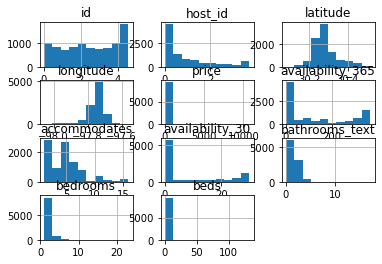

In [57]:
listings_comb.hist()